In [1]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 작업 폴더 이동
HOME = '/content/drive/MyDrive/20240527'

import os
%cd {HOME}

/content/drive/MyDrive/20240527


In [14]:
# 필요한 라이브러리 불러오기

import numpy as np
import pandas as pd

advertising = pd.read_csv("advertising.csv")
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [15]:
# 데이터 기초 정보 확인하기

#1.entry 확인 (not null 값 비교)
#2.속성 개수(데이터 프레임의 속성과 비교)
#3. Dtype(데이터 타입 확인) : 회귀인지 분류인지 판단

advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
# 데이터 통계치 확인하기
# 수치형 데이터의 통계치 출력
# 범주형 데이터는 나오지 않음
# .T 행열 바뀜

advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [17]:
# 상관관계 분석하기
# corr(): 데이터 프레임의 상관관계를 데이터 프레임 형태로 반환

corrMatrix = advertising.corr()
corrMatrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


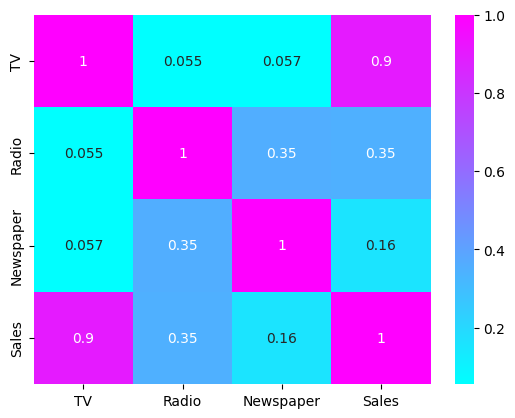

In [34]:
# 상관관계 히트맵으로 표현하기

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corrMatrix, annot=True, cmap='cool')
plt.show()

In [30]:
# cmap의 색상 종류가 궁금할 때

cmaps = plt.colormaps()
print(cmaps)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

In [37]:
# 속성 기준으로 데이터 정렬하기

corr_sort = corrMatrix[['Sales']].sort_values(by='Sales', ascending = False)
corr_sort

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349631
Newspaper,0.157960


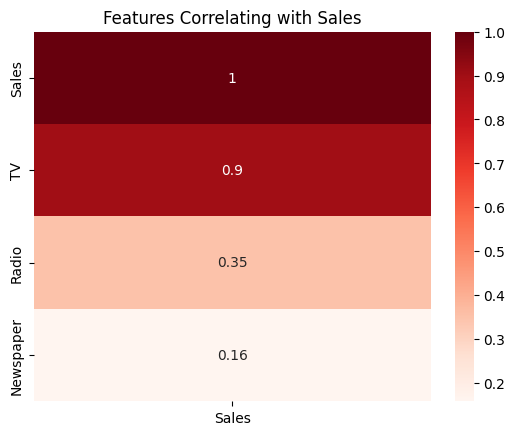

In [42]:
# 정렬된 속성 히트맵으로 시각화

import seaborn as sns
import matplotlib.pyplot as plt

corr_sort = corrMatrix[['Sales']].sort_values(by='Sales', ascending = False)
corr_sort

heatmap = sns.heatmap(corr_sort, annot=True, cmap='Reds')
heatmap.set_title('Features Correlating with Sales')
plt.show()

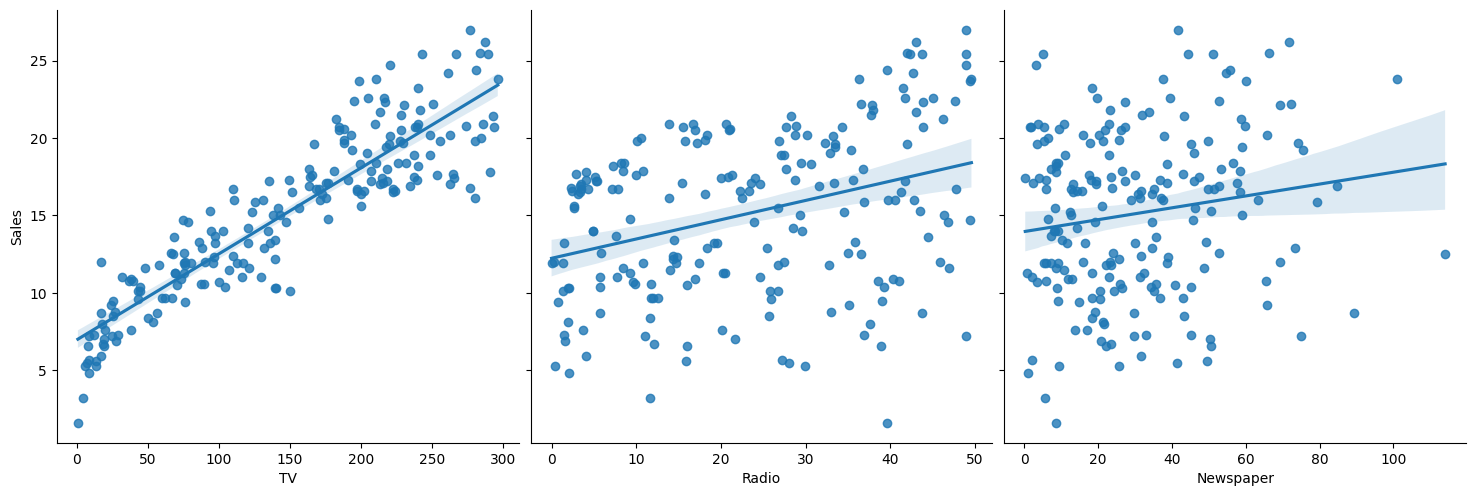

In [44]:
# 여러 개의 그래프로 속성 관계 살펴보기

sns.pairplot(data = advertising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = ['Sales'], height = 5, kind = 'reg')

In [45]:
# 데이터 전처리

# Sales 변수는 label 데이터로 Y에 저장하고 나머진 X에 저장합니다.

X = advertising.drop(columns = ['Sales'])
Y = advertising['Sales']

In [46]:
# 학습용 평가용 데이터로 분리합니다.

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state=42)

print('train_X : ')
print(train_X.head(),'\n')
print('train_Y : ')
print(train_Y.head(),'\n')

print('test_X : ')
print(test_X.head(),'\n')
print('test_Y : ')
print(test_Y.head())

train_X : 
        TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6 

train_Y : 
79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64 

test_X : 
        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2 

test_Y : 
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64


In [47]:
# 학습하기

# 다중 선형 회귀 모델을 초기화하고 학습합니다

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X, train_Y)


LinearRegression()

In [48]:
# 학습된 파라미터 값을 불러옵니다

beta_0 = model.intercept_ # y절편 (기본 판매량)
beta_1 = model.coef_[0] #TV의 계수
beta_2 = model.coef_[1] #라디오에 대한 계수
beta_3 = model.coef_[2] #신문에 대한 계수

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("beta_2: %f" % beta_2)
print("beta_3: %f" % beta_3)

beta_0: 4.714126
beta_1: 0.054509
beta_2: 0.100945
beta_3: 0.004337


In [49]:
# 예측하기

print('test_X : ')
print(test_X)

test_X : 
        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3       14.2
82    75.3   20.3       32.5
68   237.4   27.5       11.0
124  229.5   32.3       74.2
16    67.8   36.6      114.0
148   38.0   40.3       11.9
93   250.9   36.5       72.3
65    69.0    9.3        0.9
60    53.5    2.0       21.4
84   213.5   43.0       33.8
67   139.3   14.5       10.2
125   87.2   11.8       25.9
132    8.4   27.2        2.1
9    199.8    2.6       21.2
18    69.2   20.5       18.3
55   198.9   49.4       60.0
75  

In [52]:
# test_X에 대해서 예측합니다.

pred_X = model.predict(test_X)
print('test_X에 대한 예측값 : \n{}\n'.format(pred_X))

test_X에 대한 예측값 : 
[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]



In [53]:
# 새로운 데이터 df1을 정의합니다.

df1 = pd.DataFrame(np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 1]]),
                   columns=['TV', 'Radio',  'Newspaper'])
print('df1 : ')
print(df1)

df1 : 
   TV  Radio  Newspaper
0   0      0          0
1   1      0          0
2   0      1          0
3   0      0          1
4   1      1          1


In [54]:
# 2. df1에 대해서 예측합니다.


print('df1에 대한 예측값 : \n{}'.format(df1))

df1에 대한 예측값 : 
None


In [57]:
# 평가하기(RSS)

# train_X 의 예측값을 계산합니다

pred_train = model.predict(train_X)

# train_X 의 RSS 값을 계산합니다

RSS_train = np.sum((train_Y - pred_train) ** 2)

print('RSS_train : %f' % RSS_train)


RSS_train : 428.182825


In [60]:
# test_X 의 예측값을 계산합니다

pred_test = model.predict(test_X)

# 2. test_X 의 RSS 값을 계산합니다

RSS_test = np.sum((test_Y - pred_test) ** 2)

print('RSS_test : %f' % RSS_test)

RSS_test : 116.310276


In [62]:
# 평가 지표(MSE, MAE)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 1. train_X 의 MSE, MAE 값을 계산합니다

MSE_train = mean_squared_error(train_Y, pred_train)

MAE_train = mean_absolute_error(train_Y, pred_train)

print('MSE_train : %f' % MSE_train)
print('MAE_train : %f' % MAE_train)

MSE_train : 2.676143
MAE_train : 1.234416


In [63]:
# test_X 의 MSE, MAE 값을 계산합니다

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MSE_test = mean_squared_error(test_Y, pred_test)

MAE_test = mean_absolute_error(test_Y, pred_test)

print('MSE_test : %f' % MSE_test)
print('MAE_test : %f' % MAE_test)

MSE_test : 2.907757
MAE_test : 1.274826
